In [ ]:
!pip install gymnasium
!pip install gymnasium[box2d]

import time
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 11.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
  Running setup.py install for box2d-py ... done
  DEPRECATION: box2d-py was installed using the l

In [ ]:
# function to plot reward
def plot_reward(reward_list, reward_avg_list):
  plt.plot(reward_list, 'g', label='Reward')
  plt.plot(reward_avg_list, 'r', label='Average Reward')
  plt.xlabel('Episode')
  plt.ylabel('Reward Value')
  plt.title('Rewards Per Episode')
  plt.grid()
  plt.legend()
  plt.show()

# function to plot epsilon
def plot_epsilon(epsilon_list):
  plt.plot(epsilon_list)
  plt.xlabel('Episode')
  plt.ylabel('Epsilon Values')
  plt.title('Epsilon Decay')
  plt.grid()
  plt.show()

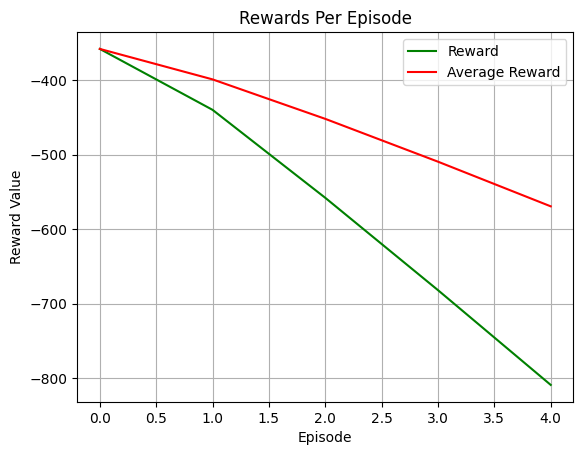

In [ ]:
# Vanilla LunarLander-v2 Environment

environment = gym.make('LunarLander-v2')
observation, info = environment.reset()

score = 0
reward_list, reward_avg_list = [], []

for itr in range(500):
  action = environment.action_space.sample()
  observation, reward, terminated, truncated, info = environment.step(action)

  score += reward

  if terminated or truncated:
    reward_list.append(score)
    reward_avg_list.append(sum(reward_list)/len(reward_list))    
    observation, info = environment.reset(seed = 42)
        
environment.close()

plot_reward(reward_list, reward_avg_list)

action = environment.action_space.sample()

In [ ]:
threshold = 0.1 # 10% engine failure, 90% engine functions properly
# Engine Failure Function
def engine_failure(threshold):
    if np.random.random() <= threshold:
        return True
    return False

# Wind Noise Function
def wind_noise(action):
  wind_direction = np.random.randint(0, 3)
  double_action = False
  
  if wind_direction == 0: # no wind
    wind_action = action
  
  elif wind_direction == 1: # wind blows in left direction
    if action == 3:
      wind_action = 0 # no action
    else:
      wind_action = 1 # left action
      double_action = True

  elif wind_direction == 2: # wind blows in right direction
    if action == 1:
      wind_action = 0 # no action
    else:
      wind_action = 3 # right action
      double_action = True

  return double_action, wind_action

# Modfified environment step function
def modified_env_step(environment, action):
  # Check action caused by wind
  double_action, wind_action = wind_noise(action)

  # Check if there is an egine failure
  engine_failed = engine_failure(threshold)
  if engine_failed:
    action = 0

  # Take steps
  if not double_action:
    observation, reward, terminated, truncated, info = environment.step(wind_action)
  else:
    observation, reward1, terminated, truncated, info = environment.step(action)
    if (terminated or truncated):
      reward = reward1
    else:
      observation, reward2, terminated, truncated, info = environment.step(wind_action)
      reward = reward1 + reward2

  return observation, reward, terminated, truncated, info

# Modfified environment step function usage
environment = gym.make('LunarLander-v2')
observation, info = environment.reset()

action = environment.action_space.sample()

observation, reward, terminated, truncated, info = modified_env_step(environment, action)

print(observation, reward, terminated, truncated, info)

[-0.00666914  1.3929296  -0.34363818 -0.41273218  0.00968288  0.1172381
  0.          0.        ] -2.3184722670885365 False False {}


In [ ]:
# Modfified environment step function with print statements
def modified_env_step_print(environment, action):
  # Check action caused by wind
  double_action, wind_action = wind_noise(action)

  # Check if there is an engine failure
  engine_failed = engine_failure(threshold)
  if engine_failed:
    action = 0

  # Take steps
  if not double_action:
    observation, reward, terminated, truncated, info = environment.step(wind_action)
    print(f'Step: \nObservation: {observation}, \nReward: {reward}, Terminated: {terminated}, Truncated: {truncated}, Info: {info}\n')
    print(f'Step Noise: Engine Failure: {engine_failed}, Wind Action: {wind_action}, Double Action: {double_action}\n')
  else:
    observation, reward1, terminated, truncated, info = environment.step(action)
    print(f'Step: \nObservation: {observation}, \nReward: {reward1}, Terminated: {terminated}, Truncated: {truncated}, Info: {info}\n')
    print(f'Step Noise: Engine Failure: {engine_failed}, Wind Action: {wind_action}, Double Action: {double_action}\n')
    if (terminated or truncated):
      reward = reward1
    else:
      observation, reward2, terminated, truncated, info = environment.step(wind_action)
      print(f'Step: \nObservation: {observation}, \nReward: {reward2}, Terminated: {terminated}, Truncated: {truncated}, Info: {info}\n')
      print(f'Step Noise: Engine Failure: {engine_failed}, Wind Action: {wind_action}, Double Action: {double_action}\n')
      reward = reward1 + reward2

  return observation, reward, terminated, truncated, info

# Modfified environment step function usage
environment = gym.make('LunarLander-v2')
observation, info = environment.reset()

action = environment.action_space.sample()

observation, reward, terminated, truncated, info = modified_env_step_print(environment, action)

print(f'Final Values: \nObservation: {observation}, \nReward: {reward}, Terminated: {terminated}, Truncated: {truncated}, Info: {info}\n')

Step: 
Observation: [ 0.0090414   1.4165936   0.45725578  0.11321694 -0.01035646 -0.10250832
  0.          0.        ], 
Reward: -0.027742772261177606, Terminated: False, Truncated: False, Info: {}

Step Noise: Engine Failure: False, Wind Action: 0, Double Action: False

Final Values: 
Observation: [ 0.0090414   1.4165936   0.45725578  0.11321694 -0.01035646 -0.10250832
  0.          0.        ], 
Reward: -0.027742772261177606, Terminated: False, Truncated: False, Info: {}



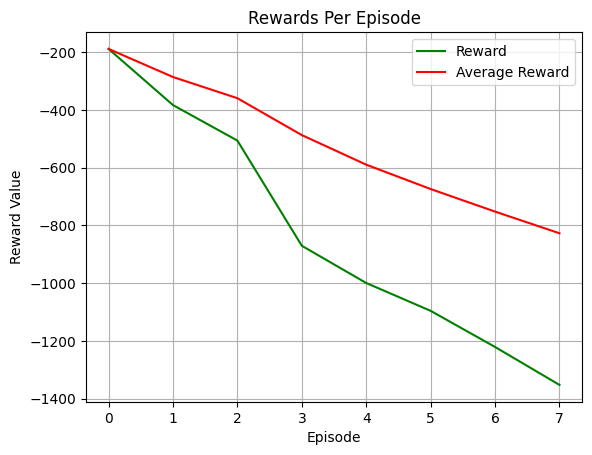

In [ ]:
# Modified LunarLander-v2 Environment

environment = gym.make('LunarLander-v2')
observation, info = environment.reset()

score = 0
reward_list, reward_avg_list = [], []

for itr in range(500):
  action = environment.action_space.sample()
  observation, reward, terminated, truncated, info = modified_env_step(environment, action)

  score += reward

  if terminated or truncated:
    reward_list.append(score)
    reward_avg_list.append(sum(reward_list)/len(reward_list))    
    observation, info = environment.reset(seed = 42)
        
environment.close()

plot_reward(reward_list, reward_avg_list)

action = environment.action_space.sample()